# Visualzing Differences Between Groups 

In data science, we often want to determine if some feature is the same or different between two groups.  Let's see what we can learn about patterns in data science salaries.

In [68]:
import pandas as pd

df = pd.read_csv('assets/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Do data scientist salaries change depending on if they are working at small, medium or large companies?


In [69]:
df.groupby('company_size')['salary_in_usd'].mean()


company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

In [70]:
df.groupby('company_size')['salary_in_usd'].var()

company_size
L    5.750552e+09
M    3.480152e+09
S    3.838440e+09
Name: salary_in_usd, dtype: float64

In [71]:
df.groupby('company_size')['salary_in_usd'].median()

company_size
L    108500.0
M    140000.0
S     62146.0
Name: salary_in_usd, dtype: float64

# Seaborn
Seaborn is a Python data visualization library based on `matplotlib` (which we have used a little bit before). It provides a higher-level interface for drawing attractive and informative statistical graphics. Here's a brief history and overview:

**Origin**: Seaborn was created by Michael Waskom, who started the project during his graduate studies. The library was intended to make visualizations that are directly related to statistical analyses more accessible and to improve upon some of the default aesthetics provided by `matplotlib`.

**Name Origin**: The name "Seaborn" is actually a reference to a character named Sam Seaborn from the television show "The West Wing". Michael Waskom, the creator, has confirmed this in discussions online.

**Aesthetics and Themes**: One of the first things users notice about Seaborn is its capability to produce visually pleasing plots with just default settings. Seaborn comes with several themes and color palettes that are designed to reveal patterns in data in a manner that's visually appealing and easily interpretable.

**Functionalities**: Over the years, Seaborn has introduced many functionalities that simplify complex visualization tasks. 

## Comparing histograms

We've looked at the histogram of a single feature before using the Pandas built-in plotting functions, but let's see how we do it using Seaborn with the `histplot` method.  

By convention, we import `seaborn` as `sns`.  We'll also import `matplotlib.pyplot` for use later.

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

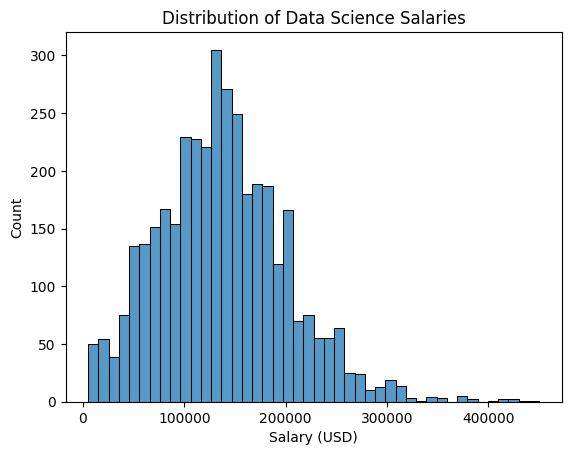

In [73]:
sns.histplot(df['salary_in_usd'])
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

Let's see how this changes depending on what size company the person was employed at.

Text(0, 0.5, 'Count')

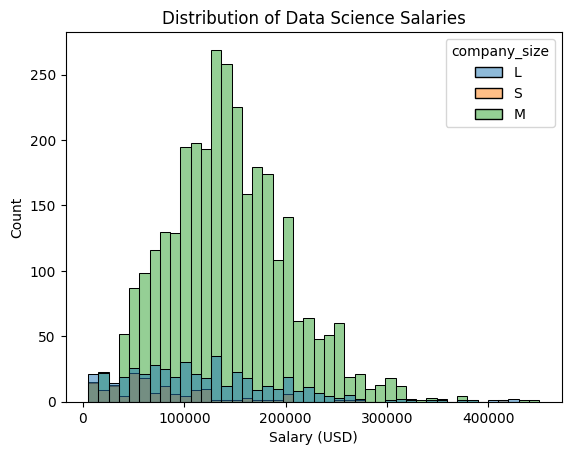

In [74]:
sns.histplot(x='salary_in_usd', data=df, hue='company_size')
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

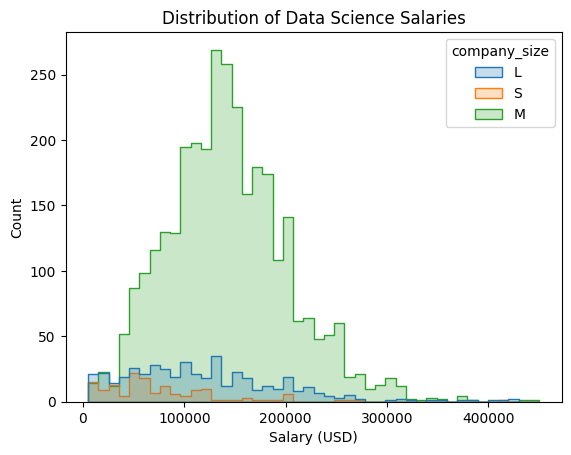

In [75]:
sns.histplot(x='salary_in_usd', data=df, hue='company_size', element='step')
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

What can we say about differences in salaries by company size?

## Comparing box plots

A different figure we can use to compare the distribution of two or more groups, which you may or may not have seen in the past, is called a box plot.

Box plots (originally called box and whisker plots) were developed by John Tukey, an influential American mathematician and statistician known for his significant contributions to various areas within the field of statistics and beyond

Box plots make it easy for us to visualize and compare 6 different aspects of the distribution of a feature: the minimum, the 25th percentile, the median, the 75th percentile, the range, and the middle 50th percentile.  

Text(0, 0.5, 'Count')

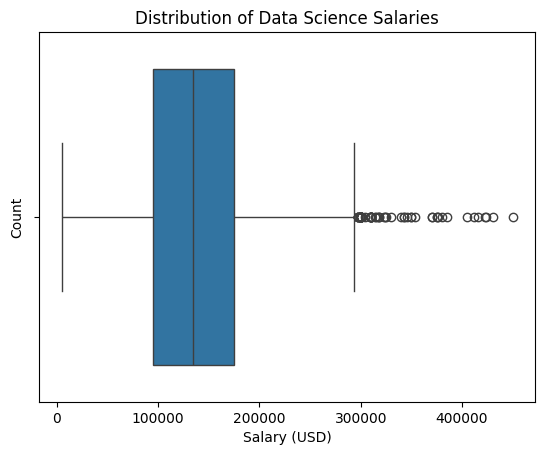

In [76]:
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

In [77]:
df['salary_in_usd'].sort_values().head()

2684    5132
2578    5409
3537    5409
3667    5679
3685    5707
Name: salary_in_usd, dtype: int64

The vertical lines on the box plot indicate the values of the minimum, the 25th percentile, the median, the 75th percentile and the max.



Now let's compare the box plots of salary by company size.

What can we say about data science salaries from looking at the boxplots?

What are aspects of the distributions that are easier to see from the boxplots than the histograms?  And vice versa?

## How do data science salaries change by experience level?

Note

EN > Entry-level / Junior

MI> Mid-level / Intermediate

SE > Senior-level / Expert

EX > Executive-level / Director

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

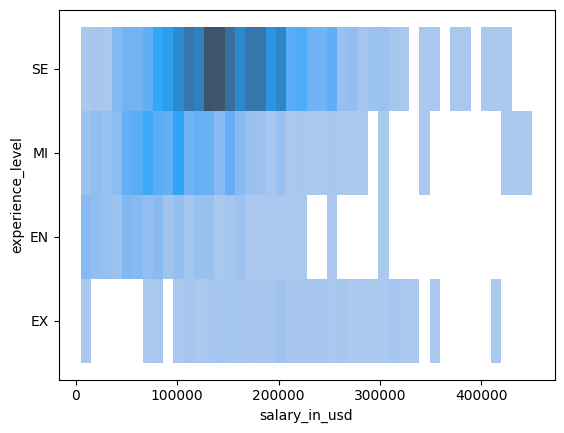

In [78]:
sns.histplot(x='salary_in_usd', y='experience_level', data=df, element='step',)


What could be better?

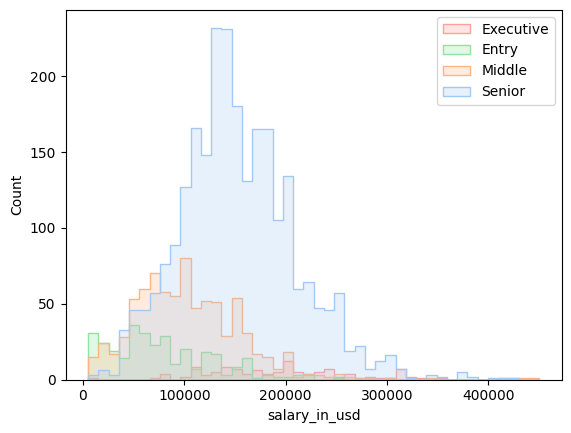

In [79]:
sns.histplot(x='salary_in_usd', hue='experience_level', data=df, element='step', palette='pastel')


# The order of the labels MUST be backwards
plt.legend(['Executive', 'Entry', 'Middle', 'Senior'])

([<matplotlib.axis.YTick at 0x2194dcb6750>,
 [Text(0, 0, 'Senior'),
  Text(0, 1, 'Middle'),
  Text(0, 2, 'Entry'),
  Text(0, 3, 'Executive')])

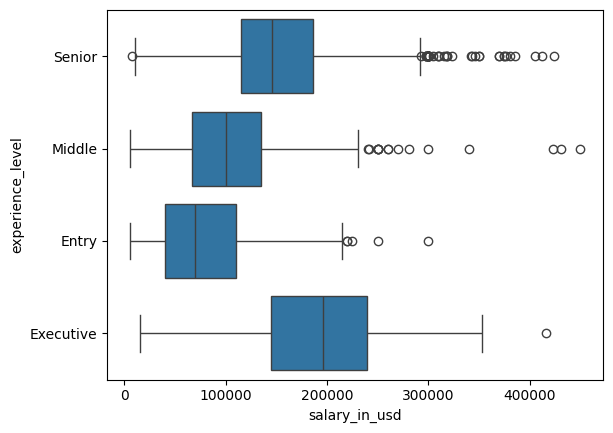

In [80]:
sns.boxplot(x='salary_in_usd', y='experience_level', data=df)
plt.yticks([0,1,2,3], ['Senior', 'Middle', 'Entry', 'Executive'])

Let's improve the labeling of this figure, too.

Now let's look at how salaries change by the percent of remote work (0, 50 or 100%)

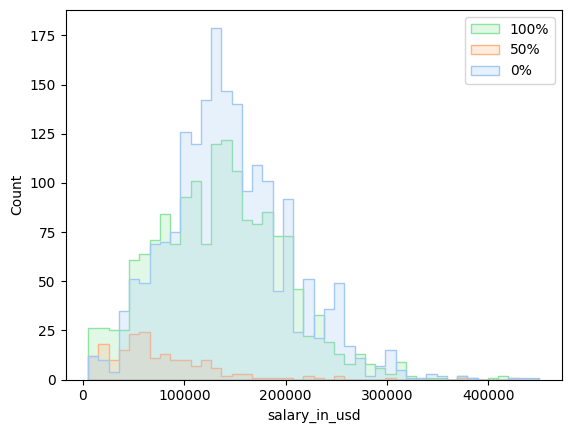

In [81]:
sns.histplot(x='salary_in_usd', hue='remote_ratio', data=df, element='step', palette='pastel')

plt.legend(['100%', '50%', '0%'])

<Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>

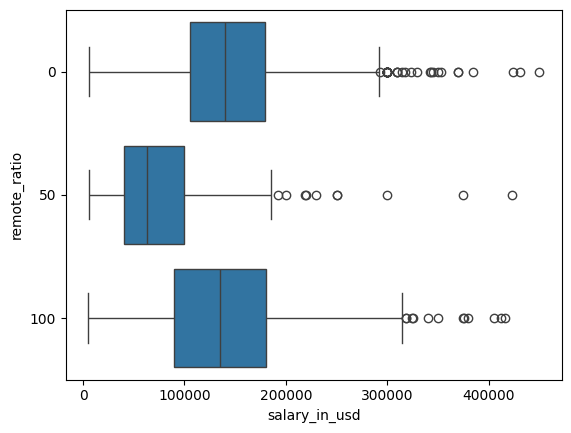

In [82]:
df['remote_ratio'] = df['remote_ratio'].astype('category')
sns.boxplot(x='salary_in_usd', y='remote_ratio', data=df)


## Box plots vs histograms

Box plots and histograms show similar but not identical information.  Here are some strengths and weaknesses of both.  

### Histogram:

**Mode:** A histogram can clearly show unimodal, bimodal, or multimodal distributions, which are distributions with one, two, or multiple peaks, respectively.

**Skewness:** The direction and degree of skewness (asymmetry) can be easily discerned from a histogram. You can visually determine if the distribution is skewed to the left (negatively skewed) or to the right (positively skewed).

**Gaps and Outliers:** While histograms aren’t the best for identifying individual outliers, they are excellent for spotting gaps in data or unusual spikes, which could suggest possible outliers or data collection issues.

**General Shape:** The overall shape of the distribution (bell-shaped, uniform, exponential, etc.) can be inferred from a histogram.

### Box Plot:

**Median:** The central line inside the box represents the median of the dataset. It gives a clear indication of the dataset's central tendency.

**Interquartile Range (IQR):** The size of the box represents the IQR, which is the range between Q1 and Q3. This shows the spread of the central 50% of the data.

**Outliers:** One of the key advantages of box plots is the ability to easily visualize outliers. Data points outside the "whiskers" are typically considered outliers and are often plotted individually.

**Spread and Symmetry:** The spread of the data can be inferred from the range (difference between the minimum and maximum) and the IQR. The symmetry of the distribution about the median can also be inferred to some degree.

**Comparisons:** Box plots are particularly useful when comparing distributions across groups. Side-by-side box plots can quickly reveal differences in medians, spreads, and the presence of outliers across multiple groups.


What is one aspect of the difference in the distribution of age between male and female passengers that is easier to observe from the histogram than from the box plot?  What is one aspect that is easier to observe from the boxplot than the histogram?

## Box plot variations

There are more recent updates to the boxplot so that they can contain even more information about the distribution of a feature.

The **violin plot** shows more detail about exactly where within each quartile observations tend to fall.



Text(0, 0.5, 'Count')

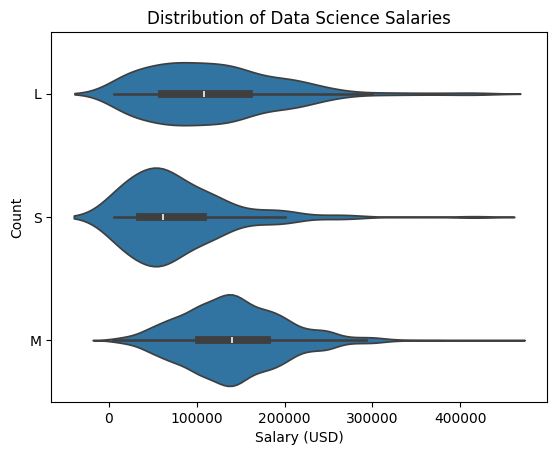

In [83]:
sns.violinplot(x='salary_in_usd', y='company_size', data=df)
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

The **swarm plot** plots a dot for ever observation.

C:\Users\joshb\OneDrive\Desktop\DVM\Data_Visualization_And_Modeling\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joshb\OneDrive\Desktop\DVM\Data_Visualization_And_Modeling\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(52.722222222222214, 0.5, 'Count')

C:\Users\joshb\OneDrive\Desktop\DVM\Data_Visualization_And_Modeling\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\joshb\OneDrive\Desktop\DVM\Data_Visualization_And_Modeling\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


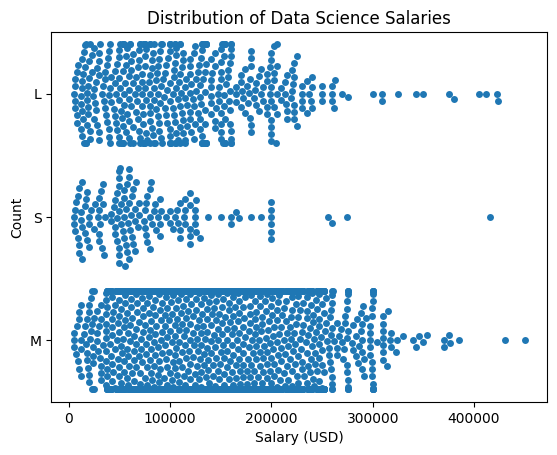

In [84]:
sns.swarmplot(x='salary_in_usd', y='company_size', data=df)
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

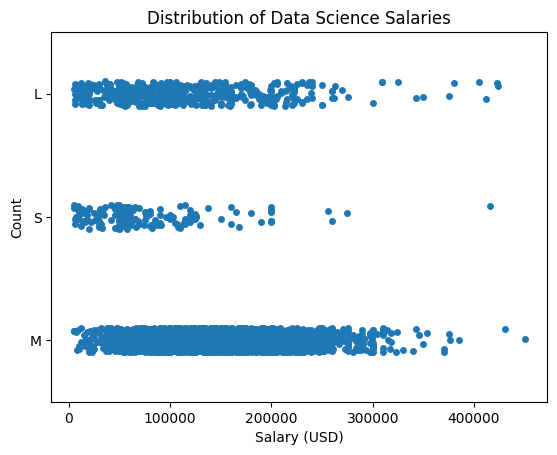

In [85]:
sns.stripplot(x='salary_in_usd', y='company_size', data=df)
plt.title('Distribution of Data Science Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

## OK
In this lesson, we learned how to compare distributions between groups.  Starting next week, we'll look at modeling relationships between two quantitative features.